In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

1. **Wicoxon signed-rank test**
2. **visualize box plot**
3. **compare and visualize UNIOA only**

# 1. wilcoxon signed-rank test
1. For non-parametric paired test (instead of paired t-test for parametric test)
2. In our case, we used 'two-sided' test:
    * H0: the difference is zero on average for a random task.
    * H1: the difference is different from zero on average for a random task.

In [2]:
# SEP_fix VS UNIOA 
SEP_fix_VS_UNIOA = pd.read_excel("D:/Temp_Huilin/auc_14.xlsx")

# syncE VS asyncE
syncE_VS_asyncE = pd.read_excel("D:/Temp_Huilin/auc_28.xlsx")

# syncG VS asyncG
syncG_VS_asyncG = pd.read_excel("D:/Temp_Huilin/auc_10.xlsx")

In [3]:
def wilcoxon(x, y, alt = 'two-sided'):
    t_value, p_value = stats.wilcoxon(x, y, alternative=alt, mode = 'approx', zero_method = 'pratt')
    positive_zero_n = 0
    negative_n = 0
    for diff in (x-y):
        if diff < 0:
            negative_n = negative_n + 1
        else:
            positive_zero_n = positive_zero_n + 1
    return negative_n,positive_zero_n, p_value

In [4]:
def wilcoxon_test(df, output_csv_name, purpose):
    column_names = ["algorithm", "dim5_p", "dim5_neg", "dim5_pos",
                                 "dim20_p", "dim20_neg", "dim20_pos"]
    Algs = ['BA', 'GOA', 'CSA', 'MFO', 'MBO', 'BOA', 'PSO']
    o = pd.DataFrame(columns = column_names)
    zeros = np.zeros(24)
    if purpose == 'SEP_fix_VS_UNIOA':
        o = pd.DataFrame(columns = column_names)
        o['algorithm'] = Algs
        for col in ["dim5", "dim20"]:
            P = []
            Neg, Pos = [], []
            if col == "dim5":
                d = 5
            else:
                d = 20
            for A in Algs:
                unioa_name = 'UNIOA_' + A
                if A == 'BA' or A == 'BOA' or A == 'PSO':
                    sep_name = 'SEP_' + A + '_fix'
                else:
                    sep_name = 'SEP_' + A
                neg_n, pos_n, p_value = wilcoxon(df[(df['Alg'] == unioa_name) & (df['Dim'] == d)]['AUC'].values,
                                    df[(df['Alg'] == sep_name) & (df['Dim'] == d)]['AUC'].values)
                Neg.append(neg_n)
                Pos.append(pos_n)
                P.append(p_value) 
            cp, cn, co = col + '_p', col + '_neg', col + '_pos'
            o[cp], o[cn], o[co]  = P, Neg, Pos
            
    if purpose == 'syncE_VS_asyncE':
        sep_algorithms = []
        unioa_algorithms = []
        for A in Algs:
            if A == 'CSA' or A == 'MFO':
                sep = 'SEP_' + A + '_syncE_or_asyncE'
                unioa = 'UNIOA_' + A + '_syncE_or_asyncE'
            else:
                sep = 'SEP_' + A + '_syncE_or_asyncE_syncG'
                unioa = 'UNIOA_' + A + '_syncE_or_asyncE_syncG'
            sep_algorithms.append(sep)
            unioa_algorithms.append(unioa)
        
        o['algorithm'] = sep_algorithms + unioa_algorithms
        for col in ["dim5", "dim20"]:
            sep_P = []
            sep_Neg, sep_Pos = [], []
            unioa_P = []
            unioa_Neg, unioa_Pos = [], []
            if col == "dim5":
                d = 5
            else:
                d = 20
            for A in Algs:
                if A == 'CSA' or A == 'MFO':
                    sep_ss = 'SEP_' + A + '_syncE'
                    sep_as = 'SEP_' + A + '_asyncE'
                    unioa_ss = 'UNIOA_' + A + '_syncE'
                    unioa_as = 'UNIOA_' + A + '_asyncE'
                else:
                    sep_ss = 'SEP_' + A + '_syncE_syncG'
                    sep_as = 'SEP_' + A + '_asyncE_syncG'
                    unioa_ss = 'UNIOA_' + A + '_syncE_syncG'
                    unioa_as = 'UNIOA_' + A + '_asyncE_syncG'
                    
                sep_neg_n, sep_pos_n, sep_p_value = wilcoxon(df[(df['Alg'] == sep_ss) & (df['Dim'] == d)]['AUC'].values,
                                    df[(df['Alg'] == sep_as) & (df['Dim'] == d)]['AUC'].values)
                sep_P.append(sep_p_value) 
                sep_Neg.append(sep_neg_n)
                sep_Pos.append(sep_pos_n)
                
                unioa_neg_n, unioa_pos_n, unioa_p_value = wilcoxon(df[(df['Alg'] == unioa_ss) & (df['Dim'] == d)]['AUC'].values, 
                                    df[(df['Alg'] == unioa_as) & (df['Dim'] == d)]['AUC'].values)
                unioa_P.append(unioa_p_value)
                unioa_Neg.append(unioa_neg_n)
                unioa_Pos.append(unioa_pos_n)
                
            cp, cn, co = col + '_p', col + '_neg', col + '_pos'
            o[cp] = sep_P + unioa_P
            o[cn] = sep_Neg + unioa_Neg
            o[co] = sep_Pos + unioa_Pos
            
    if purpose == 'syncG_VS_asyncG':
        o['algorithm'] = ['SEP_BA', 'SEP_GOA', 'SEP_MBO', 'SEP_BOA', 'SEP_PSO']
        for col in ["dim5", "dim20"]:
            P = []
            Neg, Pos = [], []
            if col == "dim5":
                d = 5
            else:
                d = 20
            for A in Algs:
                if A == 'CSA' or A == 'MFO':
                    pass
                else:
                    sep_as = 'SEP_' + A + '_asyncE_syncG'
                    sep_aa = 'SEP_' + A + '_asyncE_asyncG'
                    neg_n, pos_n, sep_p_value = wilcoxon(df[(df['Alg'] == sep_as) & (df['Dim'] == d)]['AUC'].values ,  
                                        df[(df['Alg'] == sep_aa) & (df['Dim'] == d)]['AUC'].values)
                    Neg.append(neg_n)
                    Pos.append(pos_n)
                    P.append(sep_p_value)    
            cp, cn, co = col + '_p', col + '_neg', col + '_pos'
            o[cp], o[cn], o[co]  = P, Neg, Pos
    o.to_csv(output_csv_name + '.csv', index=False)
    return o

In [5]:
wilcoxon_test(df = SEP_fix_VS_UNIOA, output_csv_name = 'SEP_fix_VS_UNIOA_d5_d20', purpose = 'SEP_fix_VS_UNIOA')

,algorithm,dim5_p,dim5_neg,dim5_pos,dim20_p,dim20_neg,dim20_pos
0,BA,0.112767,7,17,0.655861,3,21
1,GOA,0.080426,15,9,0.065699,3,21
2,CSA,0.059333,9,15,0.786040,12,12
3,MFO,0.179318,11,13,0.000191,4,20
4,MBO,0.375772,14,10,0.140972,15,9
5,BOA,0.863887,12,12,0.832730,6,18
6,PSO,0.006091,8,16,0.606408,6,18


In [6]:
wilcoxon_test(df = syncE_VS_asyncE, output_csv_name = 'syncE_VS_asyncE_d5_d20', purpose = 'syncE_VS_asyncE')

,algorithm,dim5_p,dim5_neg,dim5_pos,dim20_p,dim20_neg,dim20_pos
0,SEP_BA_syncE_or_asyncE_syncG,0.331335,10,14,0.228869,3,21
1,SEP_GOA_syncE_or_asyncE_syncG,0.626111,7,17,0.667365,5,19
2,SEP_CSA_syncE_or_asyncE,0.647568,12,12,0.886241,10,14
3,SEP_MFO_syncE_or_asyncE,0.253098,11,13,0.841000,9,15
4,SEP_MBO_syncE_or_asyncE_syncG,0.317311,10,14,0.174692,8,16
5,SEP_BOA_syncE_or_asyncE_syncG,0.775097,13,11,0.277399,9,15
6,SEP_PSO_syncE_or_asyncE_syncG,0.954431,9,15,0.194499,9,15
7,UNIOA_BA_syncE_or_asyncE_syncG,0.241427,9,15,0.596845,4,20
8,UNIOA_GOA_syncE_or_asyncE_syncG,0.646558,11,13,0.623344,8,16
9,UNIOA_CSA_syncE_or_asyncE,0.909011,11,13,0.943028,10,14


In [7]:
wilcoxon_test(df = syncG_VS_asyncG, output_csv_name = 'syncG_VS_asyncG_d5_d20', purpose = 'syncG_VS_asyncG')

,algorithm,dim5_p,dim5_neg,dim5_pos,dim20_p,dim20_neg,dim20_pos
0,SEP_BA,0.224591,14,10,0.004638,13,11
1,SEP_GOA,0.004220,17,7,0.173186,8,16
2,SEP_MBO,0.198543,15,9,0.074116,15,9
3,SEP_BOA,0.819202,13,11,0.277399,8,16
4,SEP_PSO,0.440453,14,10,0.964389,6,18


# 2. visualize box plot

In [9]:
def new_df(df, n, y_name, legend_name, purpose):
    Algs = ['BA', 'GOA', 'CSA', 'MFO', 'MBO', 'BOA', 'PSO']
    column_names = [y_name, legend_name, "value", "n"]
    o = pd.DataFrame(columns = column_names)
    #################################################
    if purpose == 'SEP_fix_VS_UNIOA':
        algs, F, value, ns = [], [], [], []
        for f in ['SEP', 'UNIOA']:
            if f == 'SEP':                
                for alg in Algs:
                    if alg == 'BA' or alg == 'BOA' or alg == 'PSO':
                        name = f + '_' + alg + '_fix'
                    else:
                        name = f + '_' + alg
                    l = df[(df['Alg'] == name) & (df['Dim'] == n)]['AUC'].values.tolist()
                    value.extend(l)
                    F = F + [f]*24  
                    algs = algs + [alg]*24  
                    ns = ns + ['n=' + str(n)]*24
            else:
                for alg in Algs:
                    name = f + '_' + alg
                    l = df[(df['Alg'] == name) & (df['Dim'] == n)]['AUC'].values.tolist()
                    value.extend(l)
                    F = F + [f]*24  
                    algs = algs + [alg]*24  
                    ns = ns + ['n=' + str(n)]*24
        o[y_name] = algs
        o[legend_name] = F
        o["value"] = value
        o['n'] = ns
        
    if purpose == 'syncE_VS_asyncE':
        names_14 = []
        for pre in ['SEP_', 'UNIOA_']:
            for alg in Algs:
                name = pre + alg
                names_14.append(name)
        algs = []
        E = []
        value = []
        ns = []
        for n in [n]:
            for e in ['syncE', 'asyncE']:
                for name in names_14:
                    if name == 'SEP_CSA' or name == 'SEP_MFO' or name == 'UNIOA_CSA' or name == 'UNIOA_MFO':
                        alg = name + '_' + e
                    else:
                        alg = name + '_' + e + '_syncG'   
                    l = df[(df['Alg'] == alg) & (df['Dim'] == n)]['AUC'].values.tolist()
                    value.extend(l)
                    E = E + [e]*24  
                    algs = algs + [name]*24  
                    ns = ns + ['n=' + str(n)]*24
        o[y_name] = algs
        o[legend_name] = E
        o["value"] = value
        o['n'] = ns
    if purpose == 'syncG_VS_asyncG':
        algs, G, value, ns = [], [], [], []
        for g in ['syncG', 'asyncG']:
            for alg in Algs:
                if alg == 'CSA' or alg == 'MFO':
                    l = [0]*24
                else:
                    name = 'SEP_' + alg + '_asyncE_' + g
                    l = df[(df['Alg'] == name) & (df['Dim'] == n)]['AUC'].values.tolist()
                value.extend(l)
                G = G + [g]*24  
                a = 'SEP_' + alg
                algs = algs + [a]*24  
                ns = ns + ['n=' + str(n)]*24
        o[y_name] = algs
        o[legend_name] = G
        o["value"] = value
        o['n'] = ns   
    return o       

In [5]:
def box_plot(df, n5, y5_name, n20, y20_name, legend_name, purpose, x_title, fig_name, title):
    df5 = new_df(df, n5, y5_name, legend_name, purpose)
    df20 = new_df(df, n20, y20_name, legend_name, purpose)
    sns.set_style("darkgrid")
    fig, axes = plt.subplots(2, 1, figsize=(11.69,8.27))
    g1 = sns.boxplot(x='value', y=y5_name, data=df5, hue=legend_name,  palette="Set3", orient="h", ax=axes[0])
    g1.set(xlabel=None)
    g2 = sns.boxplot(x='value', y=y20_name, data=df20, hue=legend_name, palette="Set3", orient="h", ax=axes[1])
    g1.get_legend().remove()
    plt.legend(bbox_to_anchor=(0.75, -0.33),loc='lower left', borderaxespad=0, title=title)
    plt.xlabel(x_title)
    plt.savefig(fig_name)
    plt.show()
    return

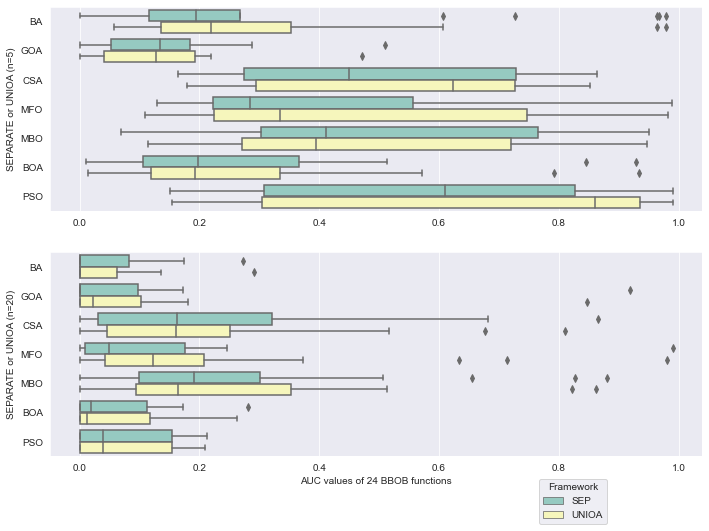

In [83]:
box_plot(df = SEP_fix_VS_UNIOA, 
         n5 = 5, 
         y5_name = 'SEPARATE or UNIOA (n=5)', 
         n20 = 20,
         y20_name = 'SEPARATE or UNIOA (n=20)', 
         legend_name = 'Framework', 
         purpose = 'SEP_fix_VS_UNIOA', 
         x_title = 'AUC values of 24 BBOB functions', 
         fig_name = 'vs.png',
         title = 'Framework')

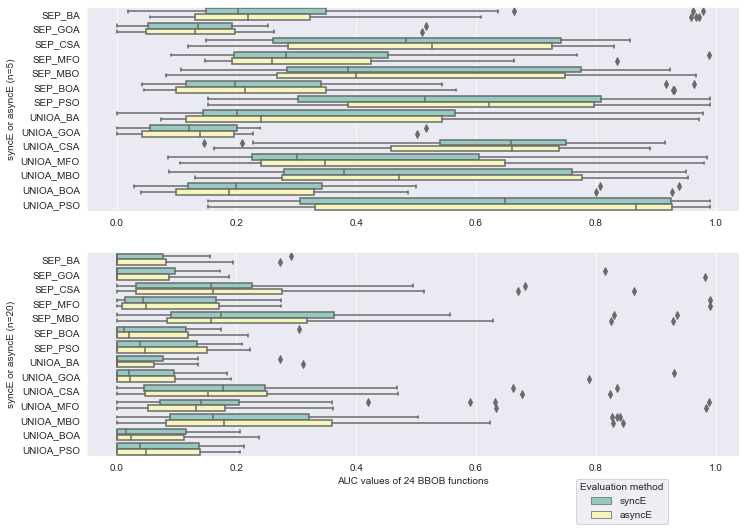

In [84]:
box_plot(df = syncE_VS_asyncE, 
         n5 = 5, 
         y5_name = 'syncE or asyncE (n=5)', 
         n20 = 20,
         y20_name = 'syncE or asyncE (n=20)', 
         legend_name = 'Evaluation method', 
         purpose = 'syncE_VS_asyncE', 
         x_title = 'AUC values of 24 BBOB functions', 
         fig_name = 'Ep.png',
         title = 'Evaluation method')

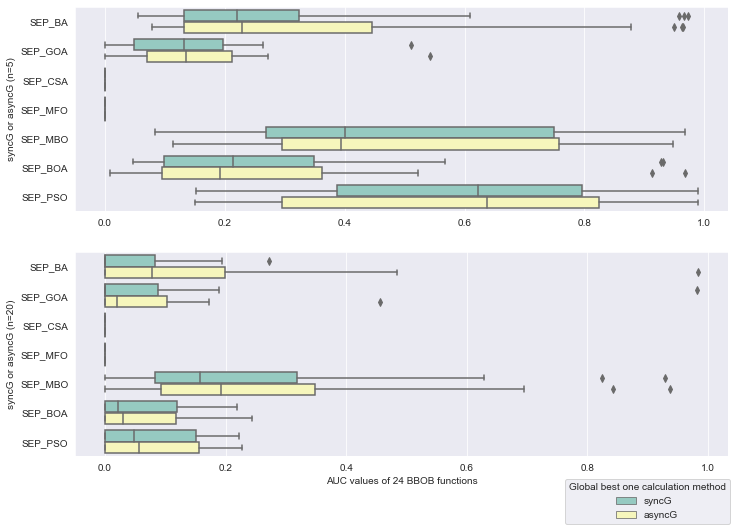

In [85]:
box_plot(df = syncG_VS_asyncG, 
         n5 = 5, 
         y5_name = 'syncG or asyncG (n=5)', 
         n20 = 20,
         y20_name = 'syncG or asyncG (n=20)', 
         legend_name = 'Global best one calcualtion method', 
         purpose = 'syncG_VS_asyncG', 
         x_title = 'AUC values of 24 BBOB functions', 
         fig_name = 'Gp.png',
        title = 'Global best one calculation method')

# compare and visualize UNIOA only

In [3]:
UNIOA = pd.read_excel("D:/Temp_Huilin/auc_7.xlsx")

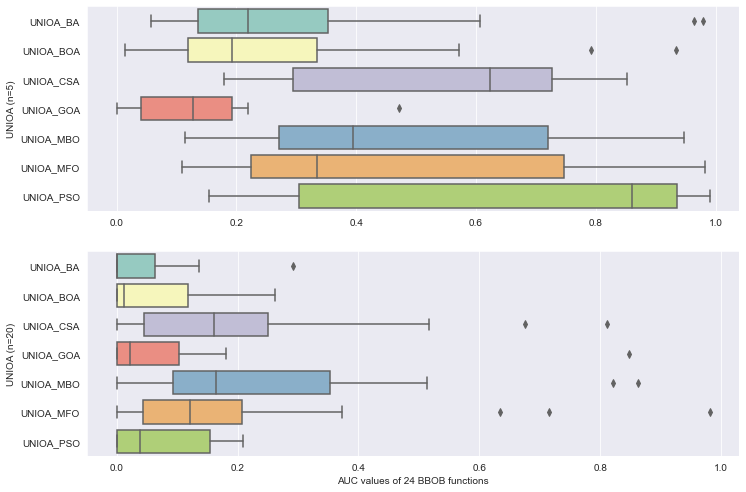

In [15]:
df5 = UNIOA[(UNIOA['Dim'] == 5)]
df20 = UNIOA[(UNIOA['Dim'] == 20)]
sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 1, figsize=(11.69,8.27))
g1 = sns.boxplot(x='AUC', y='Alg', data=df5, palette="Set3", orient="h", ax=axes[0])
g1.set(xlabel=None)
g1.set(ylabel='UNIOA (n=5)')
g2 = sns.boxplot(x='AUC', y='Alg', data=df20, palette="Set3", orient="h", ax=axes[1])
plt.ylabel('UNIOA (n=20)')
plt.xlabel('AUC values of 24 BBOB functions')
plt.savefig('uni.png')
plt.show()